In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

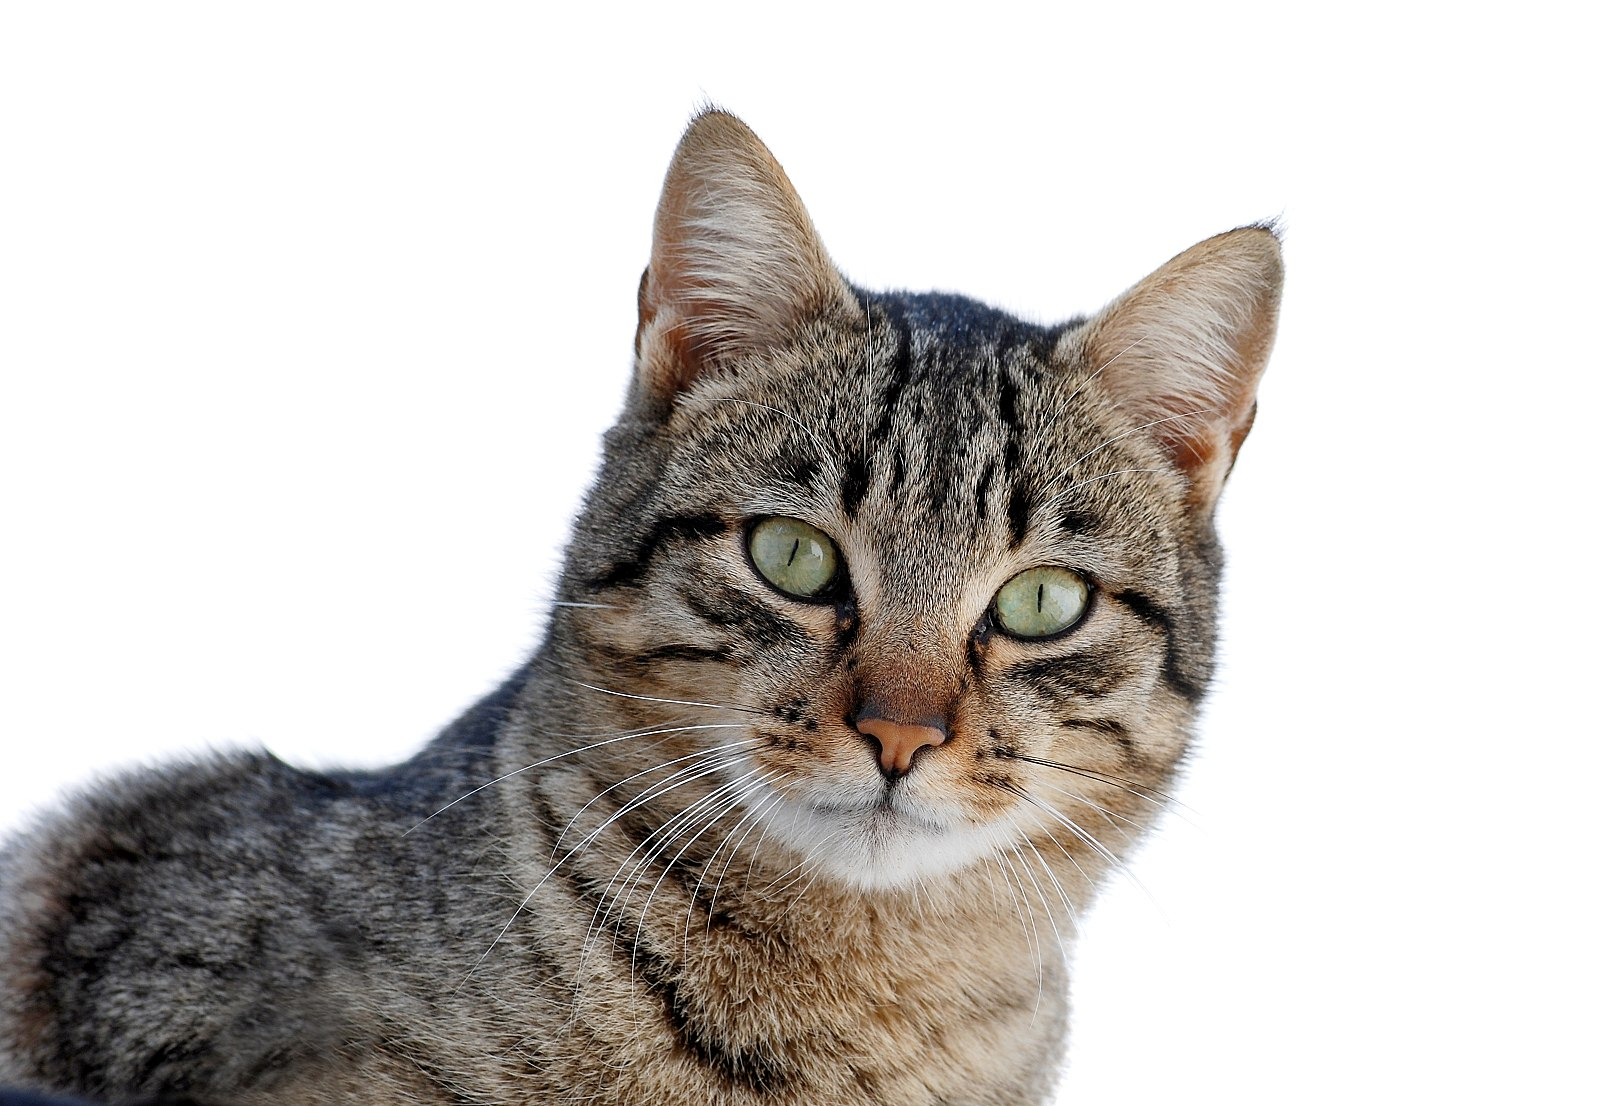

In [2]:
img = Image.open('datasets/images/cat.jpeg').convert('RGB')
img

In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms as tf

In [4]:
transforms = tf.Compose([
    tf.Resize(400),
    tf.ToTensor()])

img_tensor = transforms(img)
img_tensor.shape

torch.Size([3, 400, 578])

### Applying Convolutional Layer

In [5]:
# Defining different kernels

sharpen_kernel = [[[[0, -1, 0]],
                  [[-1, 5, -1]],
                  [[0, -1, 0]]]]

horizontal_line_kernel = [[[[1, 0, -1]],
                           [[0, 0, 0]],
                           [[-1, 0, 1]]]]

vertical_line_kernel = [[[[0, 1, 0]],
                         [[1, -4, 1]],
                         [[0, 1, 0]]]]

edge_detection_kernel = [[[[-1, -1, -1]],
                         [[-1, 8, -1]],
                         [[-1, -1, -1]]]]

In [11]:
def apply_kernel(img_tensor, kernel):
    
    conv_filter = torch.Tensor(kernel)
    print("conv_filter.shape = ", conv_filter.shape)
    
    img_tensor = img_tensor.unsqueeze(0)
    print("img_tensor.shape = ", img_tensor.shape)
    
    conv_tensor = F.conv2d(img_tensor, conv_filter, padding=0) # getting a feature map
    print("conv_tensor.shape = ",conv_tensor.shape) # having a look at the shape of the feature map
    
    conv_img = conv_tensor[0, :, :, :]
    print("conv_img.shape = ", conv_img.shape)
    
    conv_img = conv_img.numpy().squeeze() # squizing dimention for a single channel image
    
    # View the output image
    plt.figure(figsize = (20,10))
    plt.imshow(conv_img)
    
    return conv_tensor

conv_filter.shape =  torch.Size([1, 3, 1, 3])
img_tensor.shape =  torch.Size([1, 3, 400, 578])
conv_tensor.shape =  torch.Size([1, 1, 400, 576])
conv_img.shape =  torch.Size([1, 400, 576])


tensor([[[[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          ...,
          [0.0549, 0.0549, 0.0745,  ..., 1.0000, 1.0000, 1.0000],
          [0.0824, 0.0784, 0.0667,  ..., 1.0000, 1.0000, 1.0000],
          [0.0667, 0.0706, 0.0510,  ..., 1.0000, 1.0000, 1.0000]]]])

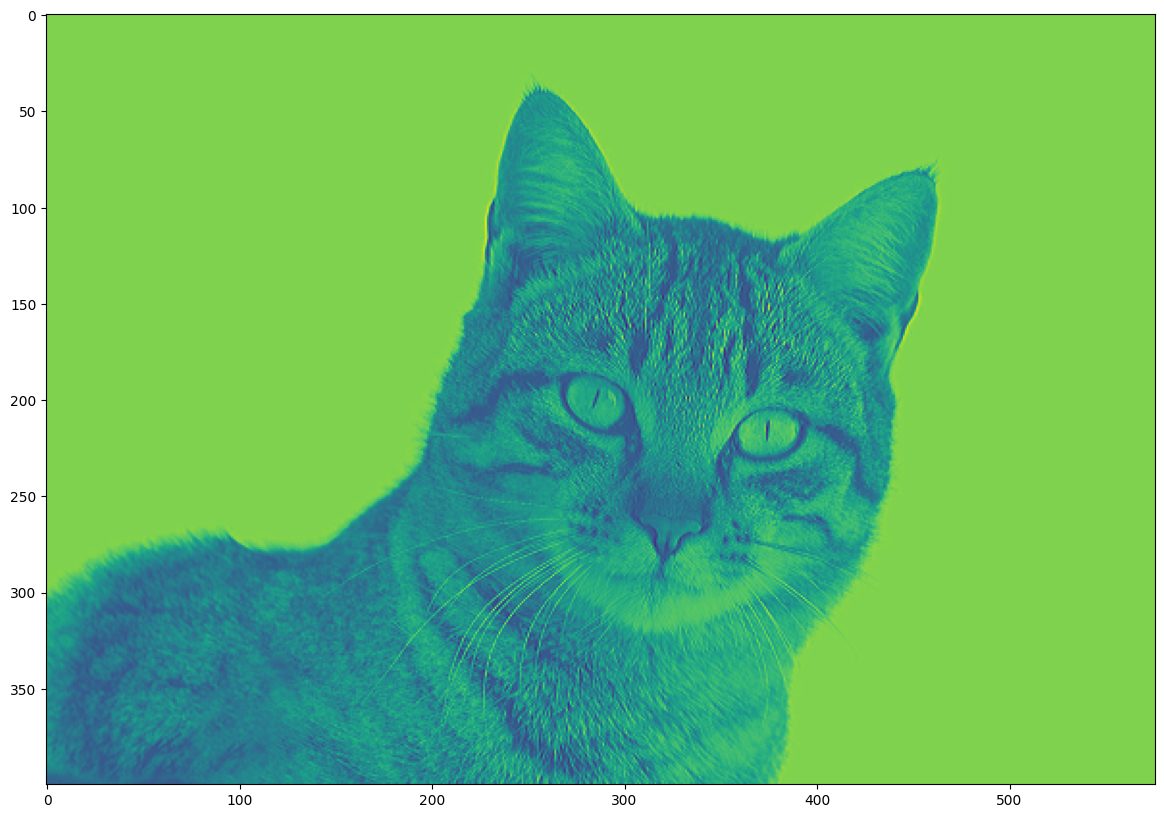

In [12]:
apply_kernel(img_tensor, sharpen_kernel)

conv_filter.shape =  torch.Size([1, 3, 1, 3])
img_tensor.shape =  torch.Size([1, 3, 400, 578])
conv_tensor.shape =  torch.Size([1, 1, 400, 576])
conv_img.shape =  torch.Size([1, 400, 576])


tensor([[[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0118, 0.0196, 0.0157,  ..., 0.0000, 0.0000, 0.0000],
          [0.0078, 0.0157, 0.0196,  ..., 0.0000, 0.0000, 0.0000],
          [0.0157, 0.0157, 0.0157,  ..., 0.0000, 0.0000, 0.0000]]]])

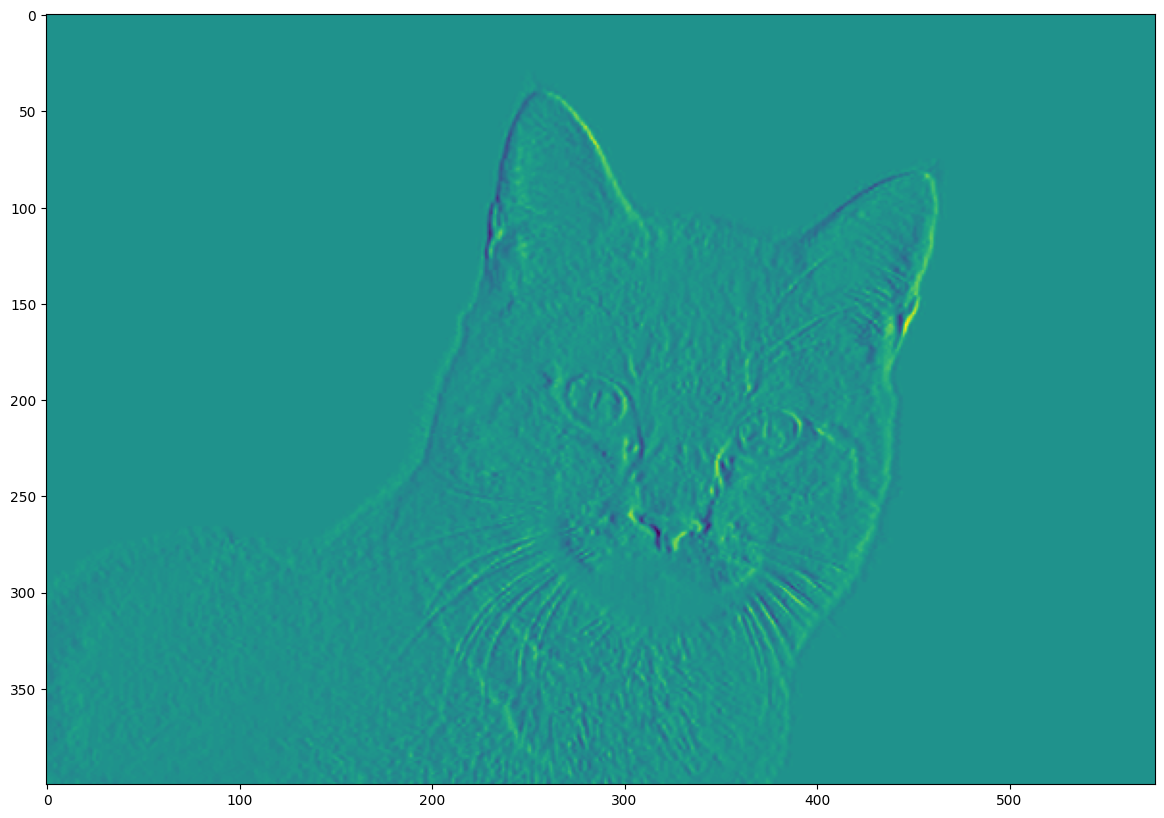

In [13]:
apply_kernel(img_tensor, horizontal_line_kernel)

conv_filter.shape =  torch.Size([1, 3, 1, 3])
img_tensor.shape =  torch.Size([1, 3, 400, 578])
conv_tensor.shape =  torch.Size([1, 1, 400, 576])
conv_img.shape =  torch.Size([1, 400, 576])


tensor([[[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0627, 0.0706, 0.0588,  ..., 0.0000, 0.0000, 0.0000],
          [0.0314, 0.0431, 0.0549,  ..., 0.0000, 0.0000, 0.0000],
          [0.0353, 0.0392, 0.0588,  ..., 0.0000, 0.0000, 0.0000]]]])

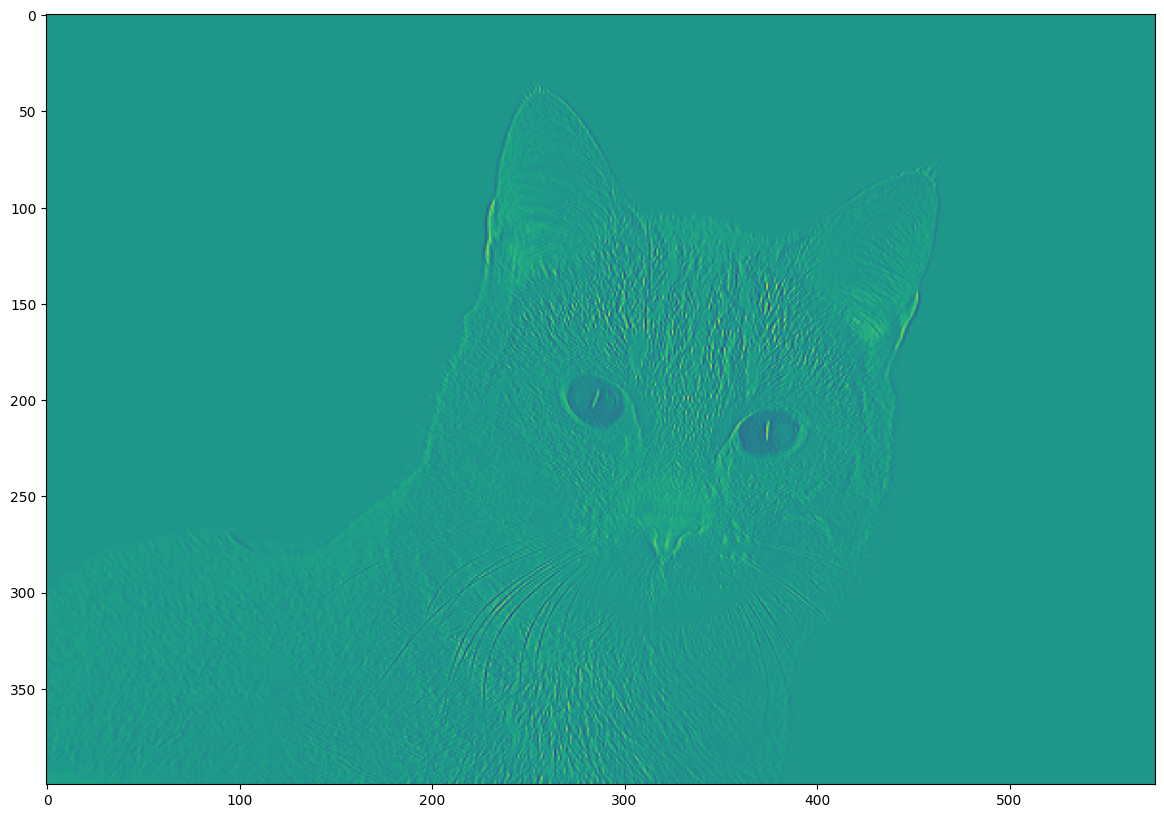

In [14]:
apply_kernel(img_tensor, vertical_line_kernel)

conv_filter.shape =  torch.Size([1, 3, 1, 3])
img_tensor.shape =  torch.Size([1, 3, 400, 578])
conv_tensor.shape =  torch.Size([1, 1, 400, 576])
conv_img.shape =  torch.Size([1, 400, 576])


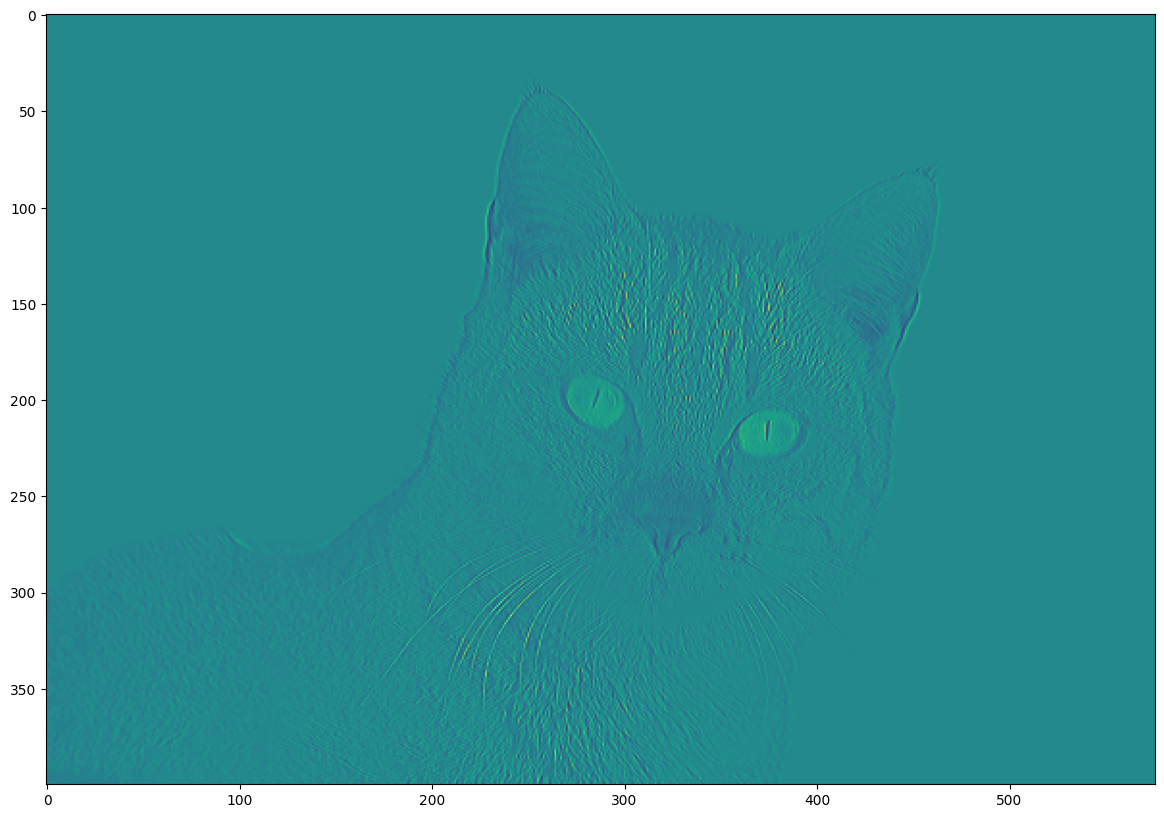

In [17]:
conv_tensor = apply_kernel(img_tensor, edge_detection_kernel)

### Applying Pooling Layer

In [22]:
pool = nn.MaxPool2d(2,2)
pool_tensor = pool(conv_tensor)
pool_tensor.shape

torch.Size([1, 1, 200, 288])

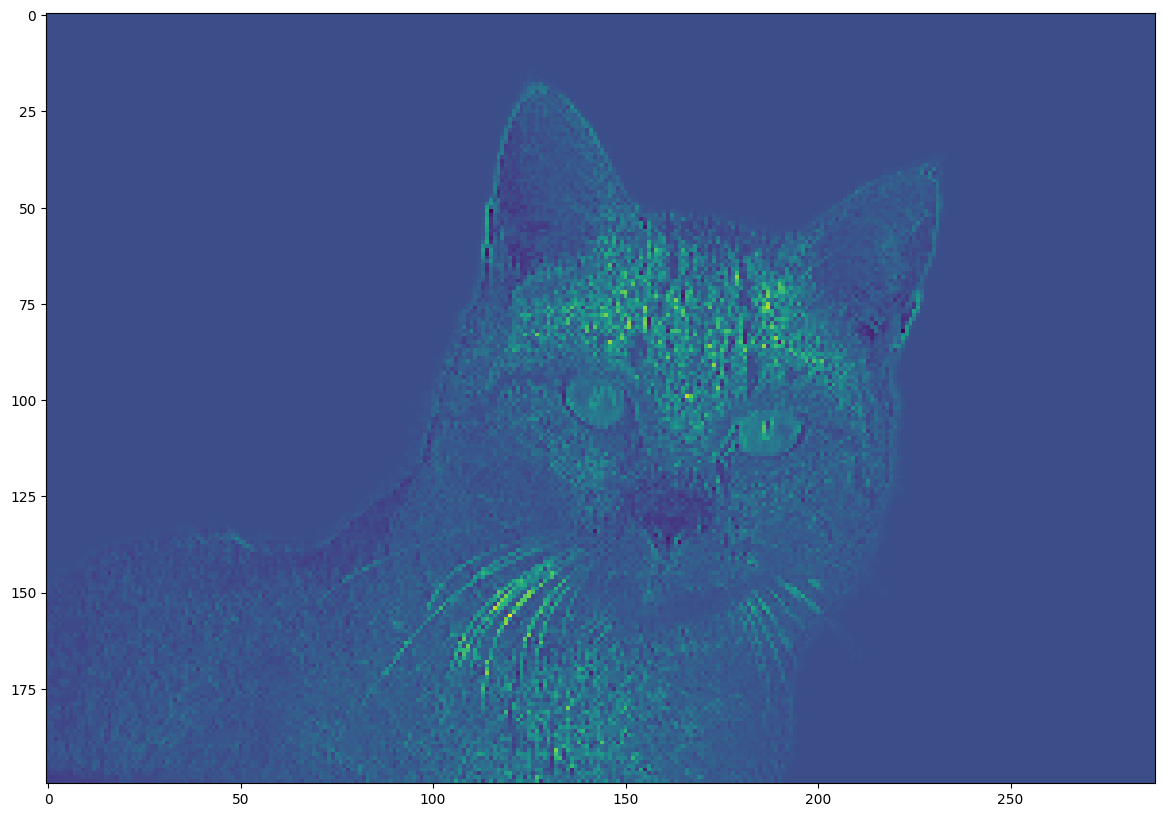

In [23]:
pool_img = pool_tensor[0, :, :, :]
pool_img = pool_img.numpy().squeeze()
    
# View the output image
plt.figure(figsize = (20,10))
plt.imshow(pool_img)   